In [60]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import warnings
warnings.filterwarnings('ignore')

Data Preparation



In [61]:
Moviedata = pd.read_csv('Final-CLEAN-Dataset.csv')
Moviedata.head()

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,Inception,2010s,12,13+,8.8,87,1,Action,United States,English,148
1,2,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
2,3,Avengers: Infinity War,2010s,4,13+,8.5,84,1,Action,United States,English,149
3,4,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
4,5,"The Good, the Bad and the Ugly",1960s,56,18+,8.8,97,2,Western,Italy,Italian,161


Summary Statistics for Age Category in General

In [63]:
X = Moviedata[['Age Category']]
Y = Moviedata['IMDb']

X = pd.get_dummies(data=X, drop_first=True)

In [64]:
X.head()

,Age Category_16+,Age Category_18+,Age Category_7+,Age Category_all
0,0,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,1,0
4,0,1,0,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4444, 4)
(1112, 4)
(4444,)
(1112,)


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
# print the intercept
print(model.intercept_)

6.334656652360515


In [68]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Age Category_16+,-0.370452
Age Category_18+,-0.221235
Age Category_7+,0.052593
Age Category_all,0.197921


In [69]:
predictions = model.predict(X_test)
predictions

array([5.96420455, 6.1134219 , 6.33465665, ..., 6.33465665, 6.5325779 ,
       6.1134219 ])

<AxesSubplot:xlabel='IMDb'>

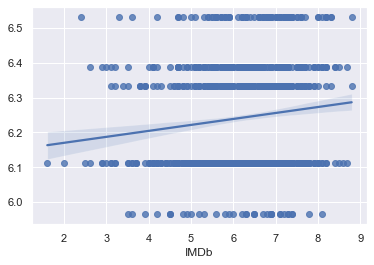

In [70]:
sb.regplot(y_test,predictions)

In [73]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                   IMDb   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     22.89
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           9.62e-19
Time:                        13:12:56   Log-Likelihood:                -6591.3
No. Observations:                4444   AIC:                         1.319e+04
Df Residuals:                    4439   BIC:                         1.322e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.3347      0.035  

In [71]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -0.045157527065146974


ValueError: Found input variables with inconsistent numbers of samples: [4444, 4167]